In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

Error: Session cannot generate requests

In [ ]:
# AI/AN -> American Indian/ Alska Native
# NHPI -> Native Hawaiian/ Pacific Islander

In [ ]:
import os
import pandas as pd

path = r"Dataset/Race and ethinicity state data"

def read_cvs(path):
    f = [cvs_ for cvs_ in os.listdir(path) if cvs_.endswith('.csv')]  # fetching all csv files
    return f

files_ = read_cvs(path)
st = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'dc', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
st= [x.upper() for x in st]

st_copy = st.copy()


records = []
files_ = read_cvs(path)
for index_, js_ in enumerate(files_):
        with open(os.path.join(path, js_)) as file_:
            st_copy[index_] = pd.read_csv(file_,parse_dates=True)
            st_copy[index_] = st_copy[index_][::-1].reset_index().drop('index',axis=1)
            # st_copy[index_] = st_copy[index_].drop("Index")
            records.append(st_copy[index_])

data_records = dict(zip(st,records))
records_copy = data_records.copy()


In [131]:
import pandas as pd
date_list = pd.DataFrame(data=pd.date_range(start='04-12-2020',end='03-07-2021'),columns=["Date"])

for state in st:
    for i in range(len(records_copy["AL"]["Date"])):
        data_records[state].Date[i]=dt.strftime(pd.to_datetime(str(data_records[state].Date[i])[:4]+"-"+ str(data_records[state].Date[i])[4:6]+"-"+ str(data_records[state].Date[i])[6:],format="%Y-%m-%d").date(),format="%m-%d-%y")
        
    data_records[state].Date=pd.to_datetime(data_records[state].Date)  
    
    data_records[state]=pd.merge(date_list,data_records[state],on='Date',how='outer')  # Merging Dataset. 

def race_data_processing(data=data_records,states=st,date_df=date_list):
    for state in states:
        for i in range(len(date_list)):
            # data[state].Date[i]=dt.strftime(pd.to_datetime(str(data[state].Date[i])[:4]+"-"+ str(data[state].Date[i])[4:6]+"-"+ str(data[state].Date[i])[6:],format="%Y-%m-%d").date(),format="%m-%d-%y")
            # 
        # data[state].Date=pd.to_datetime(data[state].Date)  
    # 
        # data[state]=pd.merge(date_df,data[state],on='Date',how='outer')  # Merging Dataset. 
            data[state].State.fillna(state,inplace=True)
            data[state].iloc[:,14:17] = data[state].iloc[:,14:17].interpolate(method='polynomial',order=2).fillna(0).astype('int')  # interpolation
            data[state].iloc[:,22:25] = data[state].iloc[:,22:25].interpolate(method='polynomial',order=2).fillna(0).astype('int')
            # data[state].iloc[:,2:8].fillna(0,inplace=True)
            # data[state].iloc[:,2:8].astype('int')
               
            data[state]["Daily_Deaths_Asian"]= data[state]["Deaths_Asian"]- data[state]["Deaths_Asian"].shift(1).rolling(7).mean() # number of new cases on that particular day. 
            data[state]["Daily_Deaths_Black"]= data[state]["Deaths_Black"]- data[state]["Deaths_Black"].shift(1).rolling(7).mean() # number of new cases on that particular day. 
            data[state]["Daily_Deaths_White"]= data[state]["Deaths_White"]- data[state]["Deaths_White"].shift(1).rolling(7).mean() # number of new cases on that particular day. 
            data[state]["Daily_Deaths_Other"]= data[state]["Deaths_Other"]- data[state]["Deaths_Other"].shift(1).rolling(7).mean() # number of new cases on that particular day. 
            data[state]["Daily_Deaths_AIAN"] = data[state]["Deaths_AIAN"] -  data[state]["Deaths_AIAN"].shift(1).rolling(7).mean()
            data[state]["Daily_Deaths_NHPI"] = data[state]["Deaths_NHPI"] -  data[state]["Deaths_NHPI"].shift(1).rolling(7).mean()
            # data[state]["Daily_Cases_Mulltiracial"] = data[state]["Cases_Multiracial"] -  data[state]["Cases_Multiracial"].shift(1).rolling(7).mean()
            # data[state]["Daily_Cases_LatinX"] = data[state]["Cases_LatinX"] -  data[state]["Cases_LatinX"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_NonHispanic"] = data[state]["Cases_Ethnicity_NonHispanic"] -  data[state]["Cases_Ethnicity_NonHispanic"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_Hispanic"] = data[state]["Cases_Ethnicity_Hispanic"] -  data[state]["Cases_Ethnicity_Hispanic"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_Unknown"] = data[state]["Cases_Ethnicity_Unknown"] -  data[state]["Cases_Ethnicity_Unknown"].shift(1).rolling(7).mean()
            
            
            data[state].iloc[:,-6:] = data[state].iloc[:,-6:].interpolate(method='linear',limit_direction = 'backward').round()
        
    
        
   
        

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
race_data_processing()

In [62]:
data_records["AL"].iloc[:,14:17]

,Deaths_AIAN,Deaths_Asian,Deaths_Black
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,3.0,43.0
4,NaN,NaN,NaN
...,...,...,...
325,NaN,24.0,2193.0
326,NaN,NaN,NaN
327,NaN,NaN,NaN
328,NaN,NaN,NaN


In [77]:
data_records["AL"].columns[-6:]

Index(['Daily_Deaths_Asian', 'Daily_Deaths_Black', 'Daily_Deaths_White',
       'Daily_Deaths_Other', 'Daily_Deaths_AIAN', 'Daily_Deaths_NHPI'],
      dtype='object')

In [92]:
race=data_records['AL'].columns[-6:]

for sts in st:
   for r in race:
       data_records[sts]["target_death_" + f"{r.split('_')[-1]}"] = np.nan

for sts in st:
    for r in race:
        data = data_records[sts][r]
        # data_records[sts]["target_" + f"{r.split('_')[-1]}"] = np.nan
        target = data_records[sts]["target_death_" + f"{r.split('_')[-1]}"]
        target_conse_3(data,target)
# how to can include below function for target variables
    
    

In [93]:
def target_conse_3(data,target): 
    """
    data = ca_data.%change
    target = ca_data.target_conse_3
    
    Target Assigning 1 when we see drop in % change in 
    number of cases for 3 consecutive days.

    Problems: 1) for cal state we found on 4 1's. which is very 
    less when considered 3 consecutive day delays.
    2) 
    """
    for i in range(5,len(data)-1):
        if data[i]<data[i-1]:                   # 5 - 4th day
            if data[i-1] < data[i-2]:           # 4 - 3nd day
                if data[i-2] < data[i-3]:       # 3 - 2rd day
                    if data[i-3] < data[i-4]:   # 2 - 1st day
                        # if data[i+4] < data[i-5]:
                            # target[i] = 1
                            # target[i+1] = 1
                            # target[i+2] = 1
                        target[i] = 1
        
    target.fillna(0,inplace=True)

In [94]:
data_records["AL"].iloc[::,-6:]

,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
325,0.0,0.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0
327,0.0,0.0,0.0,0.0,0.0,0.0
328,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
data_records["CA"].iloc[:,-6:]

,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
325,0.0,0.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0
327,0.0,0.0,0.0,0.0,0.0,0.0
328,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
target_data=data_records["AL"].iloc[::,-6:]
for ste in st[1:]:
    # temp = data_records[ste].iloc[::,-6:]
    target_data=target_data.append(data_records[ste].iloc[::,-6:],ignore_index=True)
    

In [104]:
target_data=target_data.astype('int')

In [98]:
# target_data.to_csv("race_taget.csv")

In [105]:
target_data

,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
16165,0,0,0,0,0,0
16166,0,0,0,0,0,0
16167,0,0,0,0,0,0
16168,0,0,0,0,0,0


# Calling Policy Data

In [106]:
# Call policy data
policy_data = pd.read_csv("State_combine_data.csv")
# target_data=pd.read_csv("race_taget.csv")
policy_data.drop(policy_data.columns[0],axis=1,inplace=True)
policy_data

,p1,p2,p3,p4,p5,p6
0,0.818731,0.000000,0.951229,0.951229,0.980199,0.818731
1,0.810584,0.000000,0.941765,0.941765,0.990050,0.810584
2,0.802519,0.000000,0.932394,0.932394,1.000000,0.802519
3,0.794534,0.000000,0.923116,0.923116,0.990050,0.794534
4,0.786628,0.000000,0.913931,0.913931,0.980199,0.786628
...,...,...,...,...,...,...
16165,0.031746,0.031746,0.033709,0.033709,0.477114,0.031746
16166,0.031430,0.031430,0.033373,0.033373,0.472367,0.031430
16167,0.031117,0.031117,0.033041,0.033041,0.467666,0.031117
16168,0.030807,0.030807,0.032712,0.032712,0.463013,0.030807


In [107]:
final_race_data = pd.concat([policy_data,target_data],axis=1)
final_race_data

,p1,p2,p3,p4,p5,p6,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI
0,0.818731,0.000000,0.951229,0.951229,0.980199,0.818731,0,0,0,0,0,0
1,0.810584,0.000000,0.941765,0.941765,0.990050,0.810584,0,0,0,0,0,0
2,0.802519,0.000000,0.932394,0.932394,1.000000,0.802519,0,0,0,0,0,0
3,0.794534,0.000000,0.923116,0.923116,0.990050,0.794534,0,0,0,0,0,0
4,0.786628,0.000000,0.913931,0.913931,0.980199,0.786628,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16165,0.031746,0.031746,0.033709,0.033709,0.477114,0.031746,0,0,0,0,0,0
16166,0.031430,0.031430,0.033373,0.033373,0.472367,0.031430,0,0,0,0,0,0
16167,0.031117,0.031117,0.033041,0.033041,0.467666,0.031117,0,0,0,0,0,0
16168,0.030807,0.030807,0.032712,0.032712,0.463013,0.030807,0,0,0,0,0,0


In [108]:
final_race_data=final_race_data.drop("p1",axis=1)
final_race_data

,p2,p3,p4,p5,p6,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI
0,0.000000,0.951229,0.951229,0.980199,0.818731,0,0,0,0,0,0
1,0.000000,0.941765,0.941765,0.990050,0.810584,0,0,0,0,0,0
2,0.000000,0.932394,0.932394,1.000000,0.802519,0,0,0,0,0,0
3,0.000000,0.923116,0.923116,0.990050,0.794534,0,0,0,0,0,0
4,0.000000,0.913931,0.913931,0.980199,0.786628,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16165,0.031746,0.033709,0.033709,0.477114,0.031746,0,0,0,0,0,0
16166,0.031430,0.033373,0.033373,0.472367,0.031430,0,0,0,0,0,0
16167,0.031117,0.033041,0.033041,0.467666,0.031117,0,0,0,0,0,0
16168,0.030807,0.032712,0.032712,0.463013,0.030807,0,0,0,0,0,0


# RACES

## Race

In [110]:
positive_asian_data = final_race_data[final_race_data.target_death_Asian == 1]
negative_asian_data = final_race_data[final_race_data.target_death_Asian == 0]
len(positive_asian_data),len(negative_asian_data) # 2144

(0, 16170)

In [111]:
positive_asian_data

,p2,p3,p4,p5,p6,target_death_Asian,target_death_Black,target_death_White,target_death_Other,target_death_AIAN,target_death_NHPI


In [112]:
len(positive_asian_data),len(negative_asian_data) # 2144

(0, 16170)

### Asian Model

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
x_asian = positive_asian_data
x_asian_2200 = shuffle(negative_asian_data).sample(2200)
x_asian = x_asian.append(x_asian_2200,ignore_index=True)
x_asian = shuffle(x_asian)

X_asian = x_asian.iloc[:,:5]
y_asian = x_asian.target_death_Asian

x_asian_train,x_asian_test,y_asian_train,y_asian_test = train_test_split(X_asian,y_asian,test_size=0.3,random_state=0)


#### Logistic Model

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       643
           1       0.55      0.67      0.61       661

    accuracy                           0.56      1304
   macro avg       0.56      0.56      0.55      1304
weighted avg       0.56      0.56      0.55      1304

[-0.00144508 -1.21474007  0.30451255  0.26281935 -0.66305641]


Text(0.5, 1.0, ' LR Policy Impact')

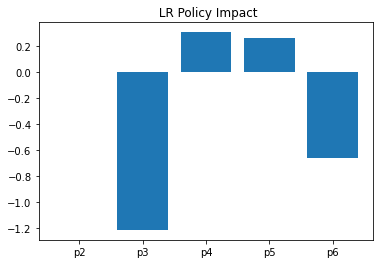

In [85]:
model_asian = LogisticRegression()
model_asian.fit(x_asian_train,y_asian_train)
model_asian_prob= model_asian.predict_proba(x_asian_test)
pred_asian_lr = model_asian.predict(x_asian_test)
cm = confusion_matrix(y_asian_test, pred_asian_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_asian_test, pred_asian_lr))

importance = model_asian.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

### Linear SVC

In [86]:
from sklearn import svm

              precision    recall  f1-score   support

           0       0.54      0.30      0.39       643
           1       0.53      0.75      0.62       661

    accuracy                           0.53      1304
   macro avg       0.53      0.53      0.50      1304
weighted avg       0.53      0.53      0.51      1304



Text(0.5, 1.0, ' SVC Policy Impact')

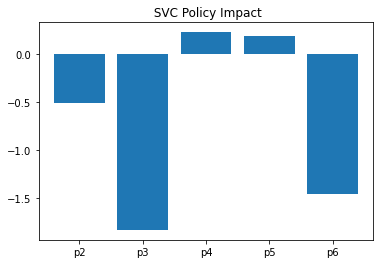

In [87]:
model_asian_svc = svm.SVC(kernel='linear')
model_asian_svc.fit(x_asian_train,y_asian_train)
asian_svc_pred = model_asian_svc.predict(x_asian_test)
print(classification_report(y_asian_test,asian_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_asian_svc.coef_[0])
# plt.ylim().
plt.title(" SVC Policy Impact")

### Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



Text(0.5, 1.0, 'RF Policy Impact')

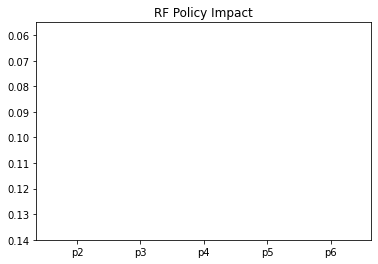

In [117]:
clf_asian = RandomForestClassifier(n_estimators = 500,max_depth=30,criterion='entropy',
            n_jobs=-1, oob_score=True,random_state = 0).fit(x_asian_train, y_asian_train)

y_pred_asian=clf_asian.predict(x_asian_test)
y_prob_asian = clf_asian.predict_proba(x_asian_test)
print(classification_report(y_asian_test, y_pred_asian))
plt.bar(x_asian.columns[:5],clf_asian.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")

In [118]:
clf_asian.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Gradient Boosting

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [120]:
gbc_asian = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_asian.fit(x_asian_train,y_asian_train)
pred_gbc_asian= gbc_asian.predict(x_asian_test)


ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [121]:
print(classification_report(y_asian_test,pred_gbc_asian))

NameError: name 'pred_gbc_asian' is not defined

Text(0.5, 1.0, 'GBC Policy Impact')

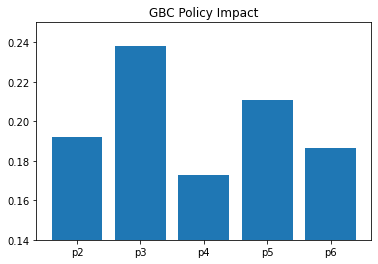

In [50]:

plt.bar(x_asian.columns[:5],gbc_asian.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

In [40]:
gbc_asian.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### BLACK RACE

In [122]:
positive_black_data = final_race_data[final_race_data.target_death_Black == 1]
negative_black_data = final_race_data[final_race_data.target_death_Black == 0]

In [123]:
len(positive_black_data),len(negative_black_data) # 

(0, 16170)

In [90]:
x_black = positive_black_data
x_black_2950 = shuffle(negative_black_data).sample(2950)
x_black = x_black.append(x_black_2950,ignore_index=True)
x_black = shuffle(x_black)

X_black = x_black.iloc[:,:5]
y_black = x_black.target_Black

x_black_train,x_black_test,y_black_train,y_black_test = train_test_split(X_black,y_black,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       890
           1       0.54      0.51      0.52       843

    accuracy                           0.55      1733
   macro avg       0.55      0.55      0.55      1733
weighted avg       0.55      0.55      0.55      1733

[-0.04421312 -0.94549112  0.66397925  0.15755503 -0.13940573]


Text(0.5, 1.0, ' LR Policy Impact')

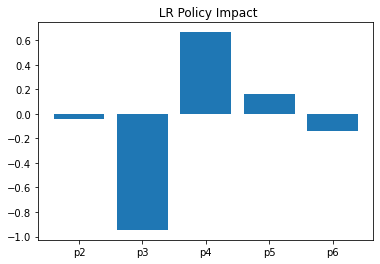

In [91]:
model_black = LogisticRegression()
model_black.fit(x_black_train,y_black_train)
model_black_prob= model_black.predict_proba(x_black_test)
pred_black_lr = model_black.predict(x_black_test)
cm = confusion_matrix(y_black_test, pred_black_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_black_test, pred_black_lr))

importance = model_black.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.51      0.99      0.68       890
           1       0.56      0.01      0.02       843

    accuracy                           0.51      1733
   macro avg       0.54      0.50      0.35      1733
weighted avg       0.54      0.51      0.36      1733



Text(0.5, 1.0, ' SVC Policy Impact')

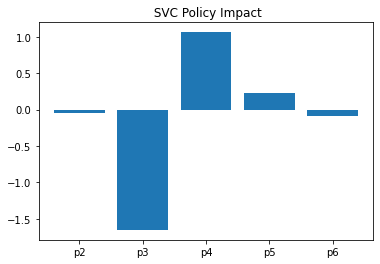

In [92]:
model_black_svc = svm.SVC(kernel='linear')
model_black_svc.fit(x_black_train,y_black_train)
black_svc_pred = model_black_svc.predict(x_black_test)
print(classification_report(y_black_test,black_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_black_svc.coef_[0])
# plt.ylim().
plt.title(" SVC Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       859
           1       0.68      0.75      0.72       874

    accuracy                           0.70      1733
   macro avg       0.70      0.70      0.70      1733
weighted avg       0.70      0.70      0.70      1733



Text(0.5, 1.0, 'RF Policy Impact')

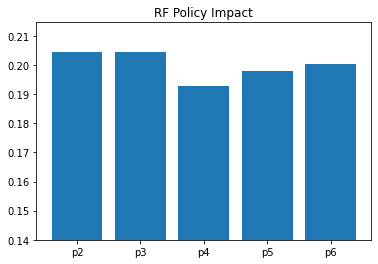

In [53]:
clf_black = RandomForestClassifier(n_estimators = 500,max_depth=30,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_black_train, y_black_train)

y_pred_black=clf_black.predict(x_black_test)
y_prob_black = clf_black.predict_proba(x_black_test)
print(classification_report(y_black_test, y_pred_black))
plt.bar(x_asian.columns[:5],clf_black.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       859
           1       0.70      0.75      0.72       874

    accuracy                           0.71      1733
   macro avg       0.71      0.71      0.71      1733
weighted avg       0.71      0.71      0.71      1733



Text(0.5, 1.0, 'GBC Policy Impact')

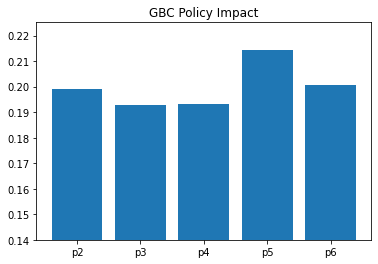

In [54]:
gbc_black = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_black.fit(x_black_train,y_black_train)
pred_gbc_black= gbc_black.predict(x_black_test)
print(classification_report(y_black_test,pred_gbc_black))
plt.bar(x_asian.columns[:5],gbc_black.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

### White RAce

In [56]:
positive_white_data = final_race_data[final_race_data.target_White == 1]
negative_white_data = final_race_data[final_race_data.target_White == 0]
len(positive_white_data),len(negative_white_data) # 2144

(3052, 13118)

In [93]:
x_white = positive_white_data
x_white_3100 = shuffle(negative_white_data).sample(3100)
x_white = x_white.append(x_white_3100,ignore_index=True)
x_white = shuffle(x_white)

X_white = x_white.iloc[:,:5]
y_white = x_white.target_White

x_white_train,x_white_test,y_white_train,y_white_test = train_test_split(X_white,y_white,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       910
           1       0.53      0.57      0.55       936

    accuracy                           0.53      1846
   macro avg       0.53      0.53      0.53      1846
weighted avg       0.53      0.53      0.53      1846

[-0.15912359 -0.47849713  0.13361088  0.01463448 -0.49608584]


Text(0.5, 1.0, ' LR Policy Impact')

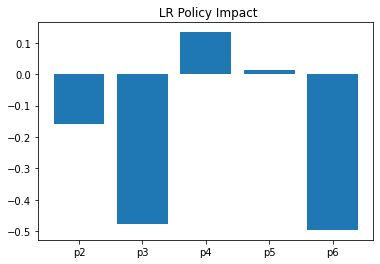

In [94]:
model_white = LogisticRegression()
model_white.fit(x_white_train,y_white_train)
model_white_prob= model_white.predict_proba(x_white_test)
pred_white_lr = model_white.predict(x_white_test)
cm = confusion_matrix(y_white_test, pred_white_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_white_test, pred_white_lr))

importance = model_white.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.55      0.27      0.36       910
           1       0.53      0.78      0.63       936

    accuracy                           0.53      1846
   macro avg       0.54      0.53      0.50      1846
weighted avg       0.54      0.53      0.50      1846



Text(0.5, 1.0, ' SVC White Policy Impact')

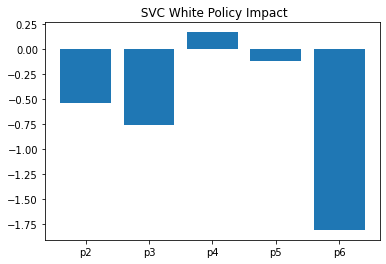

In [95]:
model_white_svc = svm.SVC(kernel='linear')
model_white_svc.fit(x_white_train,y_white_train)
white_svc_pred = model_white_svc.predict(x_white_test)
print(classification_report(y_white_test,white_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_white_svc.coef_[0])
# plt.ylim().
plt.title(" SVC White Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       910
           1       0.71      0.74      0.73       936

    accuracy                           0.72      1846
   macro avg       0.72      0.72      0.72      1846
weighted avg       0.72      0.72      0.72      1846



Text(0.5, 1.0, 'RF White Policy Impact')

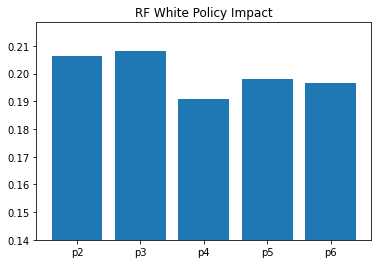

In [96]:
clf_white = RandomForestClassifier(n_estimators = 500,max_depth=30,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_white_train, y_white_train)

y_pred_white=clf_white.predict(x_white_test)
y_prob_white = clf_white.predict_proba(x_white_test)
print(classification_report(y_white_test, y_pred_white))
plt.bar(x_asian.columns[:5],clf_white.feature_importances_)
plt.ylim(0.14)
plt.title("RF White Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       959
           1       0.70      0.77      0.73       887

    accuracy                           0.73      1846
   macro avg       0.73      0.73      0.73      1846
weighted avg       0.73      0.73      0.73      1846



Text(0.5, 1.0, 'GBC Policy Impact')

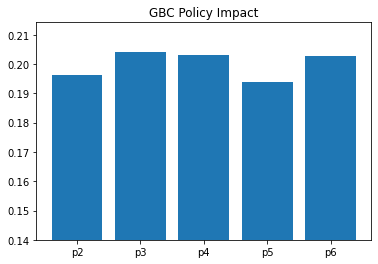

In [59]:
gbc_white = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_white.fit(x_white_train,y_white_train)
pred_gbc_white= gbc_white.predict(x_white_test)
print(classification_report(y_white_test,pred_gbc_white))
plt.bar(x_asian.columns[:5],gbc_white.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

### NHPI

In [97]:
positive_nhpi_data = final_race_data[final_race_data.target_NHPI == 1]
negative_nhpi_data = final_race_data[final_race_data.target_NHPI == 0]
len(positive_nhpi_data),len(negative_nhpi_data) # 

(631, 15539)

In [98]:
x_nhpi = positive_nhpi_data
x_nhpi_750 = shuffle(negative_nhpi_data).sample(750)
x_nhpi = x_nhpi.append(x_nhpi_750,ignore_index=True)
x_nhpi = shuffle(x_nhpi)

X_nhpi = x_nhpi.iloc[:,:5]
y_nhpi = x_nhpi.target_NHPI

x_nhpi_train,x_nhpi_test,y_nhpi_train,y_nhpi_test = train_test_split(X_nhpi,y_nhpi,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       218
           1       0.52      0.42      0.46       197

    accuracy                           0.54       415
   macro avg       0.54      0.53      0.53       415
weighted avg       0.54      0.54      0.53       415

[-0.53634098 -0.47184137 -0.06571119 -0.15035993 -0.57467294]


Text(0.5, 1.0, ' LR NHPI Policy Impact')

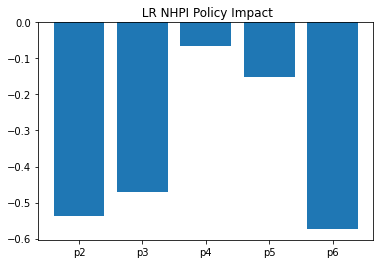

In [99]:
model_nhpi = LogisticRegression()
model_nhpi.fit(x_nhpi_train,y_nhpi_train)
model_nhpi_prob= model_nhpi.predict_proba(x_nhpi_test)
pred_nhpi_lr = model_nhpi.predict(x_nhpi_test)
cm = confusion_matrix(y_nhpi_test, pred_nhpi_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_nhpi_test, pred_nhpi_lr))

importance = model_nhpi.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR NHPI Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       218
           1       0.00      0.00      0.00       197

    accuracy                           0.53       415
   macro avg       0.26      0.50      0.34       415
weighted avg       0.28      0.53      0.36       415



C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Text(0.5, 1.0, ' SVC NHPI Policy Impact')

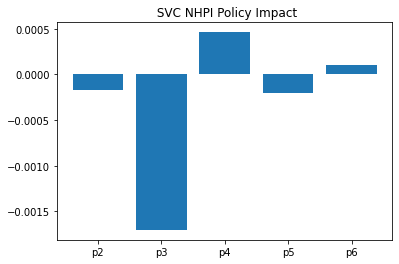

In [100]:
model_nhpi_svc = svm.SVC(kernel='linear')
model_nhpi_svc.fit(x_nhpi_train,y_nhpi_train)
nhpi_svc_pred = model_nhpi_svc.predict(x_nhpi_test)
print(classification_report(y_nhpi_test,nhpi_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_nhpi_svc.coef_[0])
# plt.ylim().
plt.title(" SVC NHPI Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       234
           1       0.71      0.77      0.74       181

    accuracy                           0.77       415
   macro avg       0.76      0.77      0.76       415
weighted avg       0.77      0.77      0.77       415



Text(0.5, 1.0, 'RF Policy Impact')

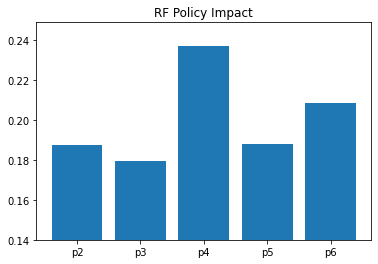

In [62]:
clf_nhpi = RandomForestClassifier(n_estimators = 500,max_depth=15,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_nhpi_train, y_nhpi_train)

y_pred_nhpi=clf_nhpi.predict(x_nhpi_test)
y_prob_nhpi = clf_nhpi.predict_proba(x_nhpi_test)
print(classification_report(y_nhpi_test, y_pred_nhpi))
plt.bar(x_asian.columns[:5],clf_nhpi.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       234
           1       0.72      0.77      0.74       181

    accuracy                           0.77       415
   macro avg       0.76      0.77      0.76       415
weighted avg       0.77      0.77      0.77       415



Text(0.5, 1.0, 'GBC NHPI Policy Impact')

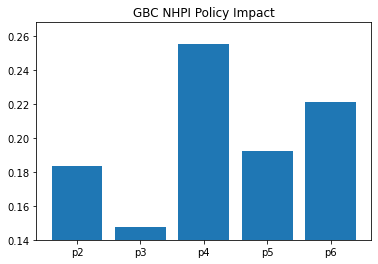

In [65]:
gbc_nhpi = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_nhpi.fit(x_nhpi_train,y_nhpi_train)
pred_gbc_nhpi= gbc_nhpi.predict(x_nhpi_test)
print(classification_report(y_nhpi_test,pred_gbc_nhpi))
plt.bar(x_asian.columns[:5],gbc_nhpi.feature_importances_)
plt.ylim(0.14)
plt.title("GBC NHPI Policy Impact")

In [972]:
gbc_nhpi.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### AIAN

In [101]:
positive_aian_data = final_race_data[final_race_data.target_AIAN == 1]
negative_aian_data = final_race_data[final_race_data.target_AIAN == 0]
len(positive_aian_data),len(negative_aian_data) # 2144

(1474, 14696)

In [102]:
x_aian = positive_aian_data
x_aian_1500 = shuffle(negative_aian_data).sample(1500)
x_aian = x_aian.append(x_aian_1500,ignore_index=True)
x_aian = shuffle(x_aian)

X_aian = x_aian.iloc[:,:5]
y_aian = x_aian.target_AIAN

x_aian_train,x_aian_test,y_aian_train,y_aian_test = train_test_split(X_aian,y_aian,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.56      0.45      0.50       438
           1       0.55      0.65      0.60       455

    accuracy                           0.55       893
   macro avg       0.55      0.55      0.55       893
weighted avg       0.55      0.55      0.55       893

[-1.98586754 -0.12247212  0.67026005  0.16514054 -0.81785147]


Text(0.5, 1.0, ' LR Policy Impact')

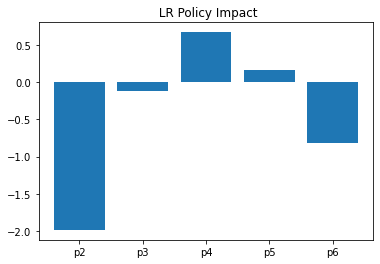

In [103]:
model_aian = LogisticRegression()
model_aian.fit(x_aian_train,y_aian_train)
model_aian_prob= model_aian.predict_proba(x_aian_test)
pred_aian_lr = model_aian.predict(x_aian_test)
cm = confusion_matrix(y_aian_test, pred_aian_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_aian_test, pred_aian_lr))

importance = model_aian.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.59      0.34      0.44       438
           1       0.55      0.77      0.64       455

    accuracy                           0.56       893
   macro avg       0.57      0.56      0.54       893
weighted avg       0.57      0.56      0.54       893



Text(0.5, 1.0, ' SVC Policy Impact')

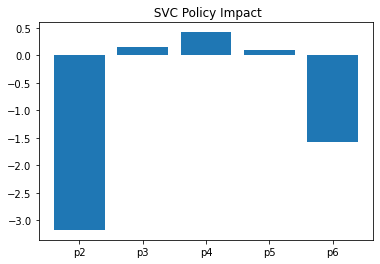

In [104]:
model_aian_svc = svm.SVC(kernel='linear')
model_aian_svc.fit(x_aian_train,y_aian_train)
aian_svc_pred = model_aian_svc.predict(x_aian_test)
print(classification_report(y_aian_test,aian_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_aian_svc.coef_[0])
# plt.ylim().
plt.title(" SVC Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       451
           1       0.73      0.77      0.75       442

    accuracy                           0.75       893
   macro avg       0.75      0.75      0.75       893
weighted avg       0.75      0.75      0.75       893



Text(0.5, 1.0, 'RF Policy Impact')

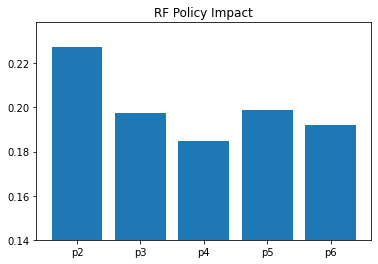

In [70]:
clf_aian = RandomForestClassifier(n_estimators = 500,max_depth=30,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_aian_train, y_aian_train)

y_pred_aian=clf_aian.predict(x_aian_test)
y_prob_aian = clf_aian.predict_proba(x_aian_test)
print(classification_report(y_aian_test, y_pred_aian))
plt.bar(x_asian.columns[:5],clf_aian.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")

### GB

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       451
           1       0.71      0.74      0.72       442

    accuracy                           0.72       893
   macro avg       0.72      0.72      0.72       893
weighted avg       0.72      0.72      0.72       893



Text(0.5, 1.0, 'GBC Policy Impact')

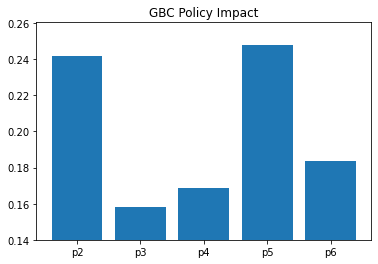

In [74]:
gbc_aian = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_aian.fit(x_aian_train,y_aian_train)
pred_gbc_aian= gbc_aian.predict(x_aian_test)
print(classification_report(y_aian_test,pred_gbc_aian))
plt.bar(x_asian.columns[:5],gbc_aian.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

#### Other

In [105]:
positive_other_data = final_race_data[final_race_data.target_Other == 1]
negative_other_data = final_race_data[final_race_data.target_Other == 0]
len(positive_other_data),len(negative_white_data) # 2144

(2585, 13118)

In [106]:
x_other = positive_other_data
x_other_2650 = shuffle(negative_other_data).sample(2650)
x_other = x_other.append(x_other_2650,ignore_index=True)
x_other = shuffle(x_other)

X_other = x_other.iloc[:,:5]
y_other = x_other.target_Other

x_other_train,x_other_test,y_other_train,y_other_test = train_test_split(X_other,y_other,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.53      0.45      0.49       786
           1       0.52      0.60      0.56       785

    accuracy                           0.52      1571
   macro avg       0.53      0.52      0.52      1571
weighted avg       0.53      0.52      0.52      1571

[ 0.40698814 -1.12732821 -0.12367391  0.04311477 -0.31864049]


Text(0.5, 1.0, ' LR Policy Impact')

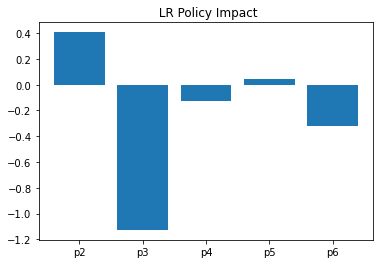

In [107]:
model_other = LogisticRegression()
model_other.fit(x_other_train,y_other_train)
model_other_prob= model_other.predict_proba(x_other_test)
pred_other_lr = model_other.predict(x_other_test)
cm = confusion_matrix(y_other_test, pred_other_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_other_test, pred_other_lr))

importance = model_other.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.56      0.30      0.39       786
           1       0.52      0.76      0.62       785

    accuracy                           0.53      1571
   macro avg       0.54      0.53      0.50      1571
weighted avg       0.54      0.53      0.50      1571



Text(0.5, 1.0, ' SVC other Policy Impact')

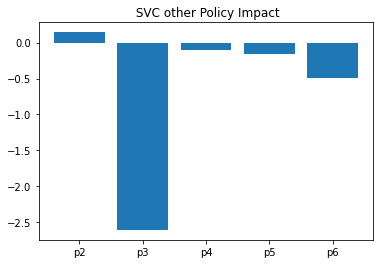

In [108]:
model_other_svc = svm.SVC(kernel='linear')
model_other_svc.fit(x_other_train,y_other_train)
other_svc_pred = model_other_svc.predict(x_other_test)
print(classification_report(y_other_test,other_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_other_svc.coef_[0])
# plt.ylim().
plt.title(" SVC other Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       763
           1       0.70      0.73      0.71       808

    accuracy                           0.70      1571
   macro avg       0.70      0.70      0.70      1571
weighted avg       0.70      0.70      0.70      1571



Text(0.5, 1.0, 'RF other Policy Impact')

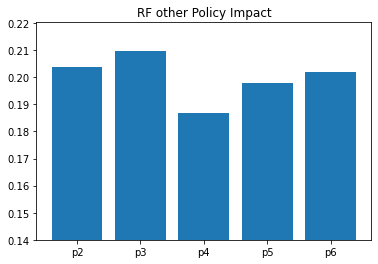

In [81]:
clf_other = RandomForestClassifier(n_estimators = 500,max_depth=30,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_other_train, y_other_train)

y_pred_other=clf_other.predict(x_other_test)
y_prob_other = clf_other.predict_proba(x_other_test)
print(classification_report(y_other_test, y_pred_other))
plt.bar(x_asian.columns[:5],clf_other.feature_importances_)
plt.ylim(0.14)
plt.title("RF other Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       763
           1       0.69      0.73      0.71       808

    accuracy                           0.69      1571
   macro avg       0.69      0.69      0.69      1571
weighted avg       0.69      0.69      0.69      1571



Text(0.5, 1.0, 'GBC Policy Impact')

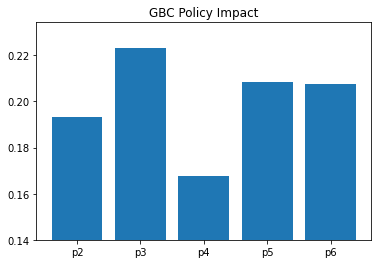

In [82]:
gbc_other = GradientBoostingClassifier(n_estimators=500,max_depth=15)
gbc_other.fit(x_other_train,y_other_train)
pred_gbc_other= gbc_other.predict(x_other_test)
print(classification_report(y_other_test,pred_gbc_other))
plt.bar(x_asian.columns[:5],gbc_other.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

# Comparing ALL RACES

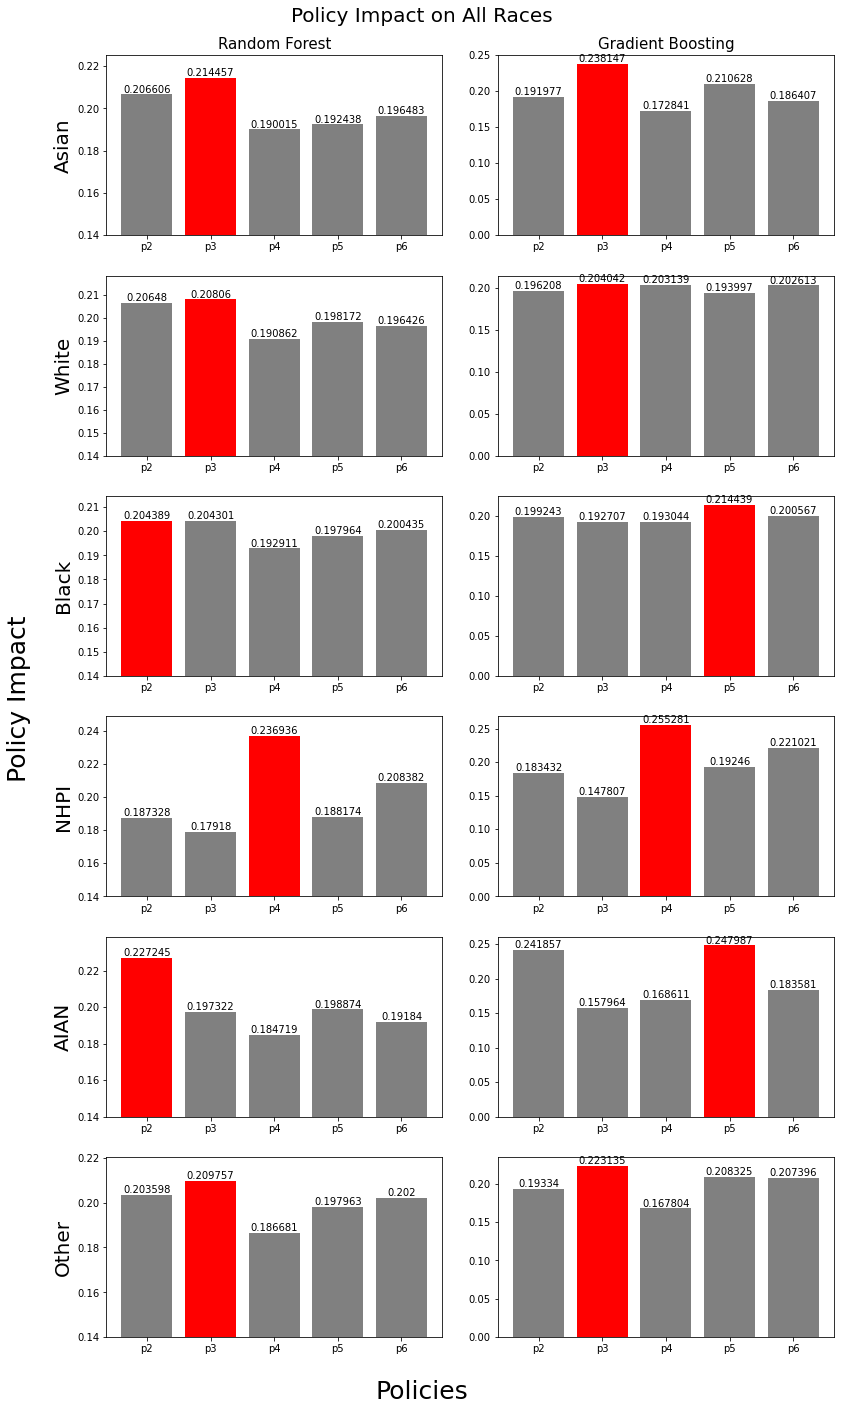

In [201]:
fig, ax = plt.subplots(6,2,figsize=(12,20))
fig.suptitle("Policy Impact on All Races",fontsize=20)
fig.subplots_adjust(top=1)
# fig.text(x=-10,y=10,s=labels)
# fig.legend(labels,'center')
# fig.text(0,1,[x for x in labels],horizontalalignment='center', verticalalignment='center')
ax[0,0].set_title('Random Forest',fontsize=15)
ax[0,1].set_title("Gradient Boosting",fontsize=15)
fig.supylabel("Policy Impact",fontsize=25)
fig.supxlabel("Policies",fontsize=25)
# ax[0,2].set_title("Linear SVC")
# ax[0,3].set_title("Logistic Regression")
ax[0,0].set_ylabel("Asian",fontsize=20)
ax[1,0].set_ylabel("White",fontsize=20)
ax[2,0].set_ylabel("Black",fontsize=20)
ax[3,0].set_ylabel("NHPI",fontsize=20)
ax[4,0].set_ylabel("AIAN",fontsize=20)
ax[5,0].set_ylabel("Other",fontsize=20)
# ASIAN
a00=ax[0,0].bar(x_asian.columns[:5],clf_asian.feature_importances_,color = ['gray' if (x != max(clf_asian.feature_importances_)) else 'red' for x in clf_asian.feature_importances_]) # RF
ax[0,0].bar_label(a00)
ax[0,0].set_ylim(0.14)
a01=ax[0,1].bar(x_asian.columns[:5],gbc_asian.feature_importances_,color = ['gray' if (x != max(gbc_asian.feature_importances_)) else 'red' for x in gbc_asian.feature_importances_])
ax[0,1].bar_label(a01)
# ax[0,2].bar([x for x in x_asian.columns[:5]],model_asian_svc.coef_[0])  # SVC
# ax[0,3].bar([x for x in x_asian.columns[:5]],model_asian.coef_[0])    # Logistic Regression

# White
a10=ax[1,0].bar(x_asian.columns[:5],clf_white.feature_importances_,color = ['gray' if (x != max(clf_white.feature_importances_)) else 'red' for x in clf_white.feature_importances_])
ax[1,0].bar_label(a10)
ax[1,0].set_ylim(0.14)
a11=ax[1,1].bar(x_asian.columns[:5],gbc_white.feature_importances_,color = ['gray' if (x != max(gbc_white.feature_importances_)) else 'red' for x in gbc_white.feature_importances_])
ax[1,1].bar_label(a11)
# ax[1,2].bar([x for x in x_asian.columns[:5]],model_white_svc.coef_[0])
# ax[1,3].bar([x for x in x_asian.columns[:5]],model_white.coef_[0])

# BLACK
a20=ax[2,0].bar(x_asian.columns[:5],clf_black.feature_importances_,color = ['gray' if (x != max(clf_black.feature_importances_)) else 'red' for x in clf_black.feature_importances_])
ax[2,0].bar_label(a20)
ax[2,0].set_ylim(0.14)
a21=ax[2,1].bar(x_asian.columns[:5],gbc_black.feature_importances_,color = ['gray' if (x != max(gbc_black.feature_importances_)) else 'red' for x in gbc_black.feature_importances_])
ax[2,1].bar_label(a21)
# ax[2,2].bar([x for x in x_asian.columns[:5]],model_black_svc.coef_[0])
# ax[2,3].bar([x for x in x_asian.columns[:5]],model_black.coef_[0])

# NHPI
a30=ax[3,0].bar(x_asian.columns[:5],clf_nhpi.feature_importances_,color = ['gray' if (x != max(clf_nhpi.feature_importances_)) else 'red' for x in clf_nhpi.feature_importances_])
ax[3,0].bar_label(a30)
ax[3,0].set_ylim(0.14)
a31=ax[3,1].bar(x_asian.columns[:5],gbc_nhpi.feature_importances_,color = ['gray' if (x != max(gbc_nhpi.feature_importances_)) else 'red' for x in gbc_nhpi.feature_importances_])
ax[3,1].bar_label(a31)
# ax[3,2].bar([x for x in x_asian.columns[:5]],model_nhpi_svc.coef_[0])
# ax[3,3].bar([x for x in x_asian.columns[:5]],model_nhpi.coef_[0])

# AIAN
a40=ax[4,0].bar(x_asian.columns[:5],clf_aian.feature_importances_,color = ['gray' if (x != max(clf_aian.feature_importances_)) else 'red' for x in clf_aian.feature_importances_])
ax[4,0].bar_label(a40)
ax[4,0].set_ylim(0.14)
a41=ax[4,1].bar(x_asian.columns[:5],gbc_aian.feature_importances_,color = ['gray' if (x != max(gbc_aian.feature_importances_)) else 'red' for x in gbc_aian.feature_importances_])
ax[4,1].bar_label(a41)
# ax[4,2].bar([x for x in x_asian.columns[:5]],model_aian_svc.coef_[0])
# ax[4,3].bar([x for x in x_asian.columns[:5]],model_aian.coef_[0])

# Other
a50=ax[5,0].bar(x_asian.columns[:5],clf_other.feature_importances_,color = ['gray' if (x != max(clf_other.feature_importances_)) else 'red' for x in clf_other.feature_importances_])
ax[5,0].bar_label(a50)
ax[5,0].set_ylim(0.14)
ax[5,1].bar_label(ax[5,1].bar(x_asian.columns[:5],gbc_other.feature_importances_,color = ['gray' if (x != max(gbc_other.feature_importances_)) else 'red' for x in gbc_other.feature_importances_]))
# ax[5,2].bar([x for x in x_asian.columns[:5]],model_other_svc.coef_[0])
# ax[5,3].bar([x for x in x_asian.columns[:5]],model_other.coef_[0])
# for i, v in enumerate(gbc_other.feature_importances_):
    # ax[5,1].text(v+0.3,i+0.3,str(v.round(3)),fontweight='bold')
    
labels = {"p2" : "Stay-At-Home/Shelter-In-Place",
          "p3" : "Closing Restaurants",
          "p4" : "Closing Business overnight",
          "p5" : "Face Mask Mandate",
          "p6" : "Inter-State Quarantine Travel"}



# fig.legend(["p2","p3","p4","p5","p6"],labels=labels.values(),loc="upper center")
# fig.add_artist(matplotlib.offsetbox.AnchoredText(labels))
           
fig.tight_layout(pad=2)

In [153]:
x_asian.columns[:5],gbc_nhpi.feature_importances_

(Index(['p2', 'p3', 'p4', 'p5', 'p6'], dtype='object'),
 array([0.18343155, 0.1478067 , 0.25528138, 0.19245979, 0.22102058]))

In [122]:
# RF [0.21598387, 0.20951715, 0.18984367, 0.17460095, 0.21005436]
country_level= {'P2': 0.21598387 , 'P3':0.20951715, 'P4': 0.18984367, 'P5':0.17460095, 'P6':0.21005436}
RF_Asian={'P2':0.20660649,'P3': 0.21445735, 'P4':0.19001512, 'P5':0.19243849, 'P6':0.19648255 }
RF_White={'P2':0.2064796,'P3': 0.20806044, 'P4':0.19086234, 'P5':0.19817212, 'P6':0.1964255}
RF_Black={'P2':0.20438901,'P3': 0.20430149, 'P4':0.19291075, 'P5':0.19796361, 'P6':0.20043515}
RF_AIAN= {'P2':0.22724511,'P3': 0.19732247, 'P4':0.18471862, 'P5':0.19887389, 'P6':0.1918399}
RF_NHPI= {'P2':0.18732806,'P3': 0.17917959, 'P4':0.23693643, 'P5':0.18817406, 'P6':0.20838188}

In [116]:
# GB 0.2571293 , 0.16798977, 0.16794329, 0.19203508, 0.21490256]
country_level= {'P2': 0.2571293 , 'P3':0.16798977, 'P4': 0.16794329, 'P5':0.19203508, 'P6':0.21490256}
GB_Asian = {'P2':0.19197667,'P3':0.23814722,'P4': 0.17284109, 'P5':0.21062762, 'P6':0.18640741}
GB_White = {'P2':0.19620799,'P3':0.20404238,'P4': 0.20313938, 'P5':0.19399704, 'P6':0.2026132}
GB_Black = {'P2':0.19924259,'P3':0.19270721,'P4': 0.19304445, 'P5':0.21443917, 'P6':0.20056658}
GB_AIAN =  {'P2':0.24185725 ,'P3':0.15796355 ,'P4': 0.16861103, 'P5':0.24798716, 'P6':0.183581}
GB_NHPI =  {'P2':0.18343155,'P3':0.20278182,'P4': 0.19702125, 'P5':0.18756193, 'P6':0.20190905}

In [123]:
gb_df=pd.DataFrame(data=country_level,index=['country_level'])
gb_df=gb_df.append(pd.DataFrame([GB_Asian,GB_White,GB_Black,GB_AIAN,GB_NHPI],index=["GB_Asian","GB_White","GB_Black","GB_AIAN","GB_NHPI"]))

gb_df["P2"]=gb_df['P2']/gb_df.loc["country_level"][0]
gb_df["P3"]=gb_df['P3']/gb_df.loc["country_level"][1]
gb_df["P4"]=gb_df['P4']/gb_df.loc["country_level"][2]
gb_df["P5"]=gb_df['P5']/gb_df.loc["country_level"][3]
gb_df["P6"]=gb_df['P6']/gb_df.loc["country_level"][4]

gb_df["P2_diff"]=gb_df["P2"][0] - gb_df["P2"][:]
gb_df["P3_diff"]=gb_df["P3"][0] - gb_df["P3"][:]
gb_df["P4_diff"]=gb_df["P4"][0] - gb_df["P4"][:]
gb_df["P5_diff"]=gb_df["P5"][0] - gb_df["P5"][:]
gb_df["P6_diff"]=gb_df["P6"][0] - gb_df["P6"][:]
gb_df.fillna(1,inplace=True)

gb_df["P2_diff_2"]=(gb_df["P2_diff"])**2
gb_df["P3_diff_2"]=(gb_df["P3_diff"])**2
gb_df["P4_diff_2"]=(gb_df["P4_diff"])**2
gb_df["P5_diff_2"]=(gb_df["P5_diff"])**2
gb_df["P6_diff_2"]=(gb_df["P6_diff"])**2

gb_df

,P2,P3,P4,P5,P6,P2_diff,P3_diff,P4_diff,P5_diff,P6_diff,P2_diff_2,P3_diff_2,P4_diff_2,P5_diff_2,P6_diff_2
country_level,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GB_Asian,0.888847,1.136648,0.910439,1.206337,0.887425,0.111153,-0.136648,0.089561,-0.206337,0.112575,0.012355,0.018673,0.008021,0.042575,0.012673
GB_White,0.908438,0.973870,1.070035,1.111088,0.964575,0.091562,0.026130,-0.070035,-0.111088,0.035425,0.008384,0.000683,0.004905,0.012341,0.001255
GB_Black,0.922488,0.919768,1.016860,1.228167,0.954832,0.077512,0.080232,-0.016860,-0.228167,0.045168,0.006008,0.006437,0.000284,0.052060,0.002040
GB_AIAN,1.119793,0.753941,0.888157,1.420308,0.873969,-0.119793,0.246059,0.111843,-0.420308,0.126031,0.014350,0.060545,0.012509,0.176659,0.015884
GB_NHPI,0.849284,0.967853,1.037808,1.074232,0.961223,0.150716,0.032147,-0.037808,-0.074232,0.038777,0.022715,0.001033,0.001429,0.005510,0.001504


In [128]:
RF_df=pd.DataFrame(data=country_level,index=['country_level'])
RF_df=RF_df.append(pd.DataFrame([RF_Asian,RF_White,RF_Black,RF_AIAN,RF_NHPI],index=["RF_Asian","RF_White","RF_Black","RF_AIAN","RF_NHPI"]))

RF_df["P2"]=RF_df['P2']/RF_df.loc["country_level"][0]
RF_df["P3"]=RF_df['P3']/RF_df.loc["country_level"][1]
RF_df["P4"]=RF_df['P4']/RF_df.loc["country_level"][2]
RF_df["P5"]=RF_df['P5']/RF_df.loc["country_level"][3]
RF_df["P6"]=RF_df['P6']/RF_df.loc["country_level"][4]

RF_df["P2_diff"]=RF_df["P2"][0] - RF_df["P2"][:]
RF_df["P3_diff"]=RF_df["P3"][0] - RF_df["P3"][:]
RF_df["P4_diff"]=RF_df["P4"][0] - RF_df["P4"][:]
RF_df["P5_diff"]=RF_df["P5"][0] - RF_df["P5"][:]
RF_df["P6_diff"]=RF_df["P6"][0] - RF_df["P6"][:]
RF_df.fillna(1,inplace=True)

RF_df["P2_diff_2"]=(RF_df["P2_diff"])**2
RF_df["P3_diff_2"]=(RF_df["P3_diff"])**2
RF_df["P4_diff_2"]=(RF_df["P4_diff"])**2
RF_df["P5_diff_2"]=(RF_df["P5_diff"])**2
RF_df["P6_diff_2"]=(RF_df["P6_diff"])**2

new_rf=RF_df.iloc[:,-5:].round(5)
new_rf["RACE_MSE"]=new_rf.sum(axis=1)
new_rf.loc["Policy_MSE"]=[x for x in new_rf.sum(axis=0)]
new_rf


,P2_diff_2,P3_diff_2,P4_diff_2,P5_diff_2,P6_diff_2,RACE_MSE
country_level,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
RF_Asian,0.00189,0.00056,0.00000,0.01044,0.00417,0.01706
RF_White,0.00194,0.00005,0.00003,0.01823,0.00421,0.02446
RF_Black,0.00288,0.00062,0.00026,0.01790,0.00210,0.02376
RF_AIAN,0.00272,0.00339,0.00073,0.01933,0.00752,0.03369
RF_NHPI,0.01760,0.02097,0.06153,0.00604,0.00006,0.10620
Policy_MSE,0.02703,0.02559,0.06255,0.07194,0.01806,0.20517


In [125]:
new_gb=gb_df.iloc[:,-5:]
new_gb["RACE_MSE"]=new_gb.sum(axis=1)
new_gb.loc["Policy_MSE"]=[x for x in new_gb.sum(axis=0)]
new_gb

,P2_diff_2,P3_diff_2,P4_diff_2,P5_diff_2,P6_diff_2,RACE_MSE
country_level,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GB_Asian,0.012355,0.018673,0.008021,0.042575,0.012673,0.094297
GB_White,0.008384,0.000683,0.004905,0.012341,0.001255,0.027567
GB_Black,0.006008,0.006437,0.000284,0.052060,0.002040,0.066830
GB_AIAN,0.014350,0.060545,0.012509,0.176659,0.015884,0.279947
GB_NHPI,0.022715,0.001033,0.001429,0.005510,0.001504,0.032192
Policy_MSE,0.063812,0.087371,0.027149,0.289145,0.033356,0.500833


In [ ]:
# Which Race is being more impacted?  Ans -> RF_AIAN, GB_Asian
# Which Policy has the highest impact on the Race?  
# Which Policy is more impactfull? Rf-> P5, GB -> P3

In [131]:
print(new_rf)
print("")
print(new_gb)

               P2_diff_2  P3_diff_2  P4_diff_2  P5_diff_2  P6_diff_2  RACE_MSE
country_level    0.00000    0.00000    0.00000    0.00000    0.00000   0.00000
RF_Asian         0.00189    0.00056    0.00000    0.01044    0.00417   0.01706
RF_White         0.00194    0.00005    0.00003    0.01823    0.00421   0.02446
RF_Black         0.00288    0.00062    0.00026    0.01790    0.00210   0.02376
RF_AIAN          0.00272    0.00339    0.00073    0.01933    0.00752   0.03369
RF_NHPI          0.01760    0.02097    0.06153    0.00604    0.00006   0.10620
Policy_MSE       0.02703    0.02559    0.06255    0.07194    0.01806   0.20517

               P2_diff_2  P3_diff_2  P4_diff_2  P5_diff_2  P6_diff_2  RACE_MSE
country_level   0.000000   0.000000   0.000000   0.000000   0.000000  0.000000
GB_Asian        0.012355   0.018673   0.008021   0.042575   0.012673  0.094297
GB_White        0.008384   0.000683   0.004905   0.012341   0.001255  0.027567
GB_Black        0.006008   0.006437   0.000284   0.